## Activities

#### Activity 01: One Dimensional Density Estimation

In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import sklearn.model_selection
import sklearn.neighbors

seaborn.set()

In [2]:
# randomly generate values
# for which we will estimate a density

rand = numpy.random.RandomState(100)
vals = rand.randn(1000)  # standard normal
vals[375:] += 3.5

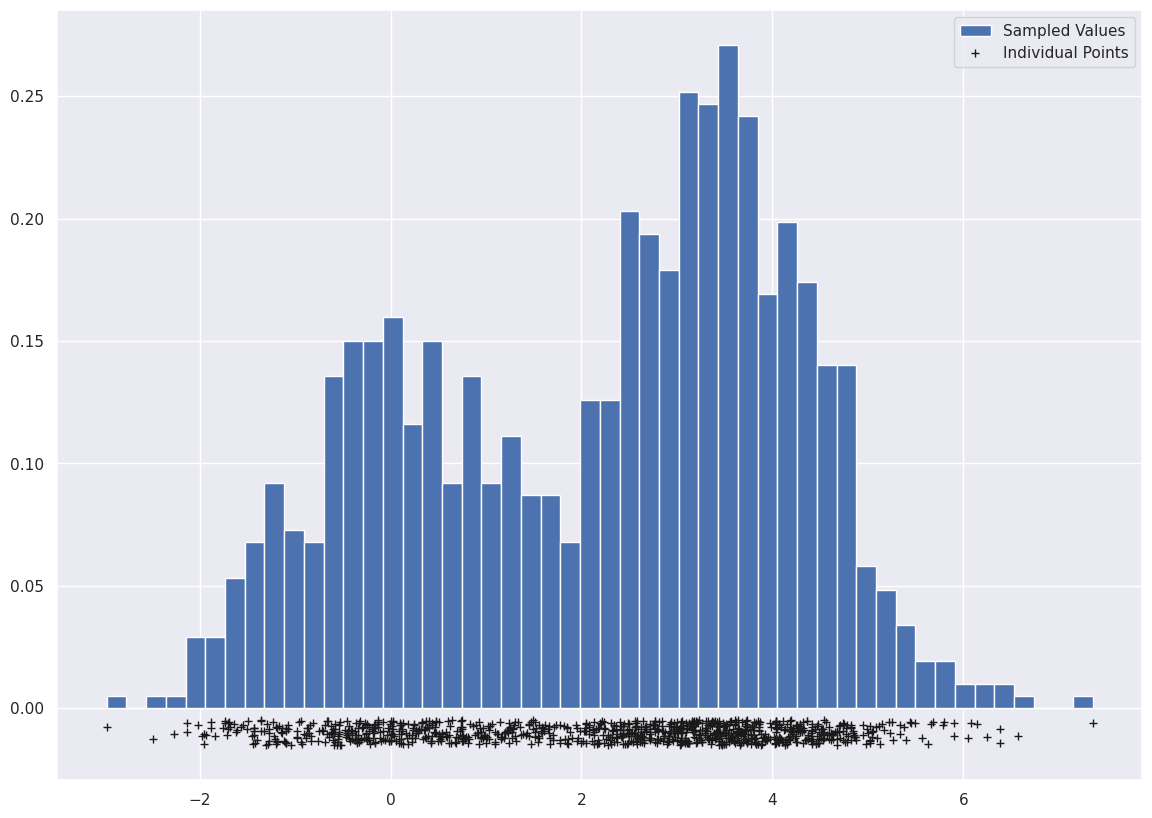

In [3]:
# plot the randomly generated values
# as a histogram

fig, ax = plt.subplots(figsize=(14, 10))
ax.hist(vals, bins=50, density=True, label='Sampled Values')
ax.plot(vals, -0.005 - 0.01 * numpy.random.random(len(vals)), '+k', label='Individual Points')
ax.legend(loc='upper right')
plt.show()

In [4]:
# grid search
# optimal bandwidth value

bandwidths = 10 ** numpy.linspace(-1, 1, 100)

grid = sklearn.model_selection.GridSearchCV(
    estimator=sklearn.neighbors.KernelDensity(kernel="gaussian"),
    param_grid={"bandwidth": bandwidths},
    cv=10
)
grid.fit(vals[:, None])

GridSearchCV(cv=10, estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.27825594,  0.29150531,  0.30538555,
        0.319926...
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47707636,
        2.59502421,  2.71858824,  2.84803587,  2.98364724,  3.12571585,
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])})

In [5]:
# extract the optimal bandwidth value

best_bandwidth = grid.best_params_["bandwidth"]

print(
    "Best Bandwidth Value: {}"
    .format(best_bandwidth)
)

Best Bandwidth Value: 0.40370172585965547


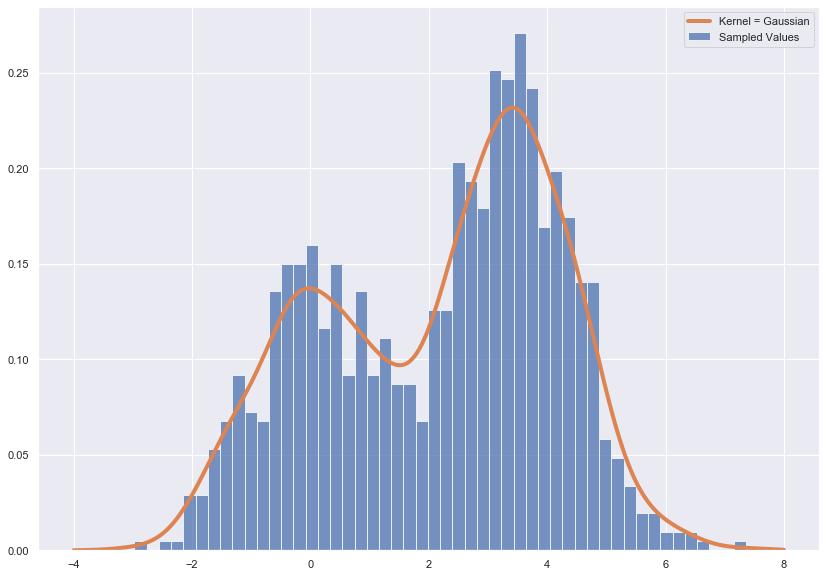

In [6]:
# replot the histogram
# with the optimal estimated density overlayed

fig, ax = plt.subplots(figsize=(14, 10))

ax.hist(vals, bins=50, density=True, alpha=0.75, label='Sampled Values')

x_vec = numpy.linspace(-4, 8, 10000)[:, numpy.newaxis]
log_density = numpy.exp(grid.best_estimator_.score_samples(x_vec))
ax.plot(x_vec[:, 0], log_density, '-', linewidth=4, label='Kernel = Gaussian')

ax.legend(loc='upper right')
plt.show()

#### Activity 02: London Crime

In [42]:
# define base path

base_path = "/home/jovyan/shared/Learning materials/subsections/1.*/code/data/Hotspot/metro-jul18-dec18/{yr_mon}/{yr_mon}-metropolitan-street.csv"
print(base_path)


/home/jovyan/shared/Learning materials/subsections/1.*/code/data/Hotspot/metro-jul18-dec18/{yr_mon}/{yr_mon}-metropolitan-street.csv


In [44]:
# create the six file tags
# used to load in the data

yearmon_list = [
    "2018-0" + str(i) if i <= 9 else "2018-" + str(i) 
    for i in range(8, 13)
]

print(yearmon_list)

['2018-08', '2018-09', '2018-10', '2018-11', '2018-12']


In [45]:
# load the data
# print some basic information about the data

data_yearmon_list = []

for idx, i in enumerate(yearmon_list):
    df = pandas.read_csv(
        base_path.format(yr_mon=i), 
        header=0
    )
    
    data_yearmon_list.append(df)
    
    if idx == 0:
        print("Month: {}".format(i))
        print("Dimensions: {}".format(df.shape))
        print("Head:\n{}\n".format(df.head(2)))

Month: 2018-08
Dimensions: (88864, 12)
Head:
                                            Crime ID    Month  \
0  6c2c1f9e0d9918e0291fe32eb81a12ef3be90afc14b51e...  2018-08   
1                                                NaN  2018-08   

                   Reported by                 Falls within  Longitude  \
0  Metropolitan Police Service  Metropolitan Police Service  -0.805749   
1  Metropolitan Police Service  Metropolitan Police Service   0.134947   

    Latitude               Location  LSOA code                  LSOA name  \
0  51.798149  On or near Lower Road  E01017687        Aylesbury Vale 019A   
1  51.588063  On or near Mead Grove  E01000027  Barking and Dagenham 001A   

                     Crime type Last outcome category  Context  
0  Violence and sexual offences   Under investigation      NaN  
1         Anti-social behaviour                   NaN      NaN  



In [46]:
london = pandas.concat(data_yearmon_list)

In [47]:
# perform diagnostics on the
# full concatenated data set

print(
    "Dimensions - Full Data:\n{}\n"
    .format(london.shape)
)
print(
    "Unique Months - Full Data:\n{}\n"
    .format(london["Month"].unique())
)
print(
    "Number of Unique Crime Types - Full Data:\n{}\n"
    .format(london["Crime type"].nunique())
)
print(
    "Unique Crime Types - Full Data:\n{}\n"
    .format(london["Crime type"].unique())
)
print(
    "Count Occurrences Of Each Unique Crime Type - Full Type:\n{}\n"
    .format(london["Crime type"].value_counts())
)

Dimensions - Full Data:
(450355, 12)

Unique Months - Full Data:
['2018-08' '2018-09' '2018-10' '2018-11' '2018-12']

Number of Unique Crime Types - Full Data:
14

Unique Crime Types - Full Data:
['Violence and sexual offences' 'Anti-social behaviour' 'Bicycle theft'
 'Burglary' 'Criminal damage and arson' 'Other theft' 'Public order'
 'Shoplifting' 'Vehicle crime' 'Robbery' 'Other crime' 'Drugs'
 'Possession of weapons' 'Theft from the person']

Count Occurrences Of Each Unique Crime Type - Full Type:
Crime type
Violence and sexual offences    95306
Anti-social behaviour           94251
Other theft                     51422
Vehicle crime                   49755
Burglary                        34824
Criminal damage and arson       23408
Public order                    19699
Theft from the person           18920
Shoplifting                     17749
Drugs                           14876
Robbery                         14104
Bicycle theft                    9068
Other crime              

In [48]:
# filter the data down

london_subset = london[["Month", "Longitude", "Latitude", "Crime type"]]
london_subset.head(5)

,Month,Longitude,Latitude,Crime type
0,2018-08,-0.805749,51.798149,Violence and sexual offences
1,2018-08,0.134947,51.588063,Anti-social behaviour
2,2018-08,0.140192,51.582311,Anti-social behaviour
3,2018-08,0.136387,51.589215,Anti-social behaviour
4,2018-08,0.136387,51.589215,Anti-social behaviour


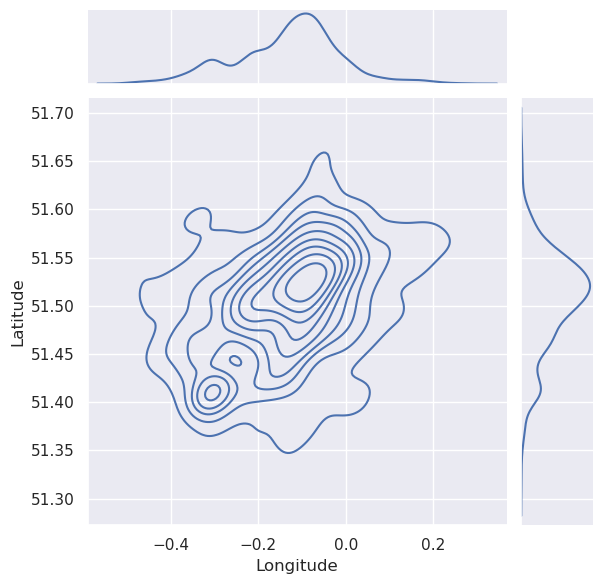

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for bicycle thefts in August 2018
crime_bicycle_jul = london_subset[
    (london_subset["Crime type"] == "Bicycle theft") & 
    (london_subset["Month"] == "2018-08")
]

# Create a joint plot using seaborn
sns.jointplot(x="Longitude", y="Latitude", data=crime_bicycle_jul, kind="kde")

# Show the plot
plt.show()


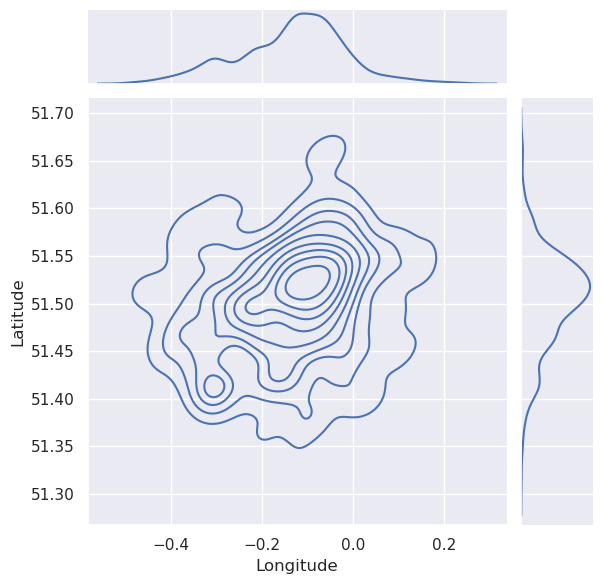

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for bicycle thefts in August 2018
crime_bicycle_jul = london_subset[
    (london_subset["Crime type"] == "Bicycle theft") & 
    (london_subset["Month"] == "2018-09")
]

# Create a joint plot using seaborn
sns.jointplot(x="Longitude", y="Latitude", data=crime_bicycle_jul, kind="kde")

# Show the plot
plt.show()


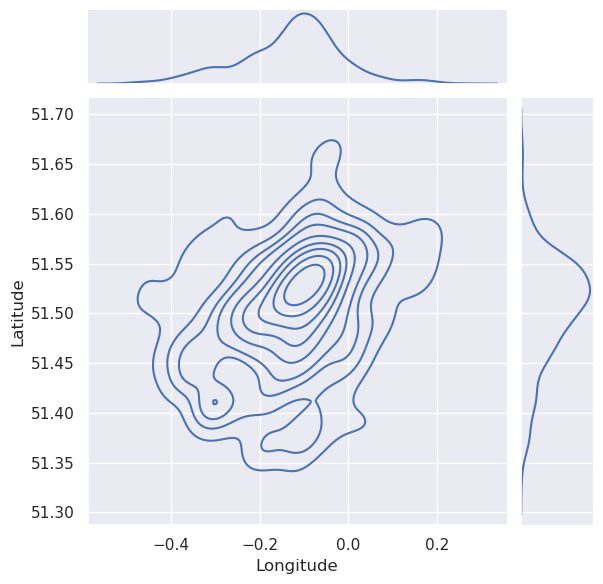

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for bicycle thefts in August 2018
crime_bicycle_jul = london_subset[
    (london_subset["Crime type"] == "Bicycle theft") & 
    (london_subset["Month"] == "2018-12")
]

# Create a joint plot using seaborn
sns.jointplot(x="Longitude", y="Latitude", data=crime_bicycle_jul, kind="kde")

# Show the plot
plt.show()


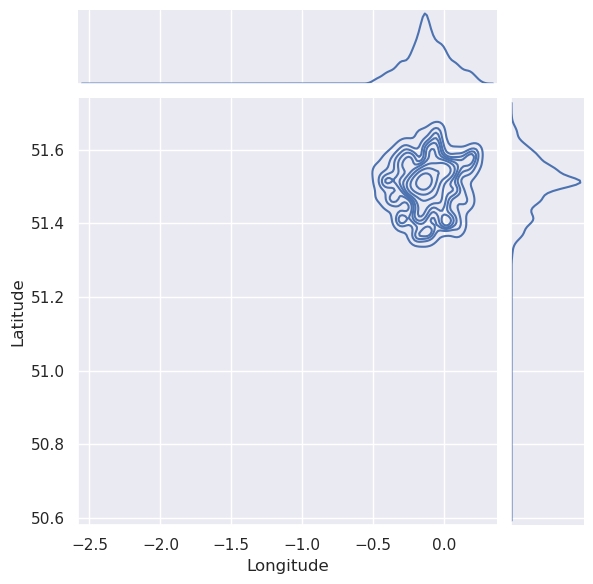

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for bicycle thefts in August 2018
crime_shoplift_aug = london_subset[
    (london_subset["Crime type"] == "Shoplifting") & 
    (london_subset["Month"] == "2018-08")
]

# Create a joint plot using seaborn
sns.jointplot(x="Longitude", y="Latitude", data=crime_bicycle_jul, kind="kde")

# Show the plot
plt.show()


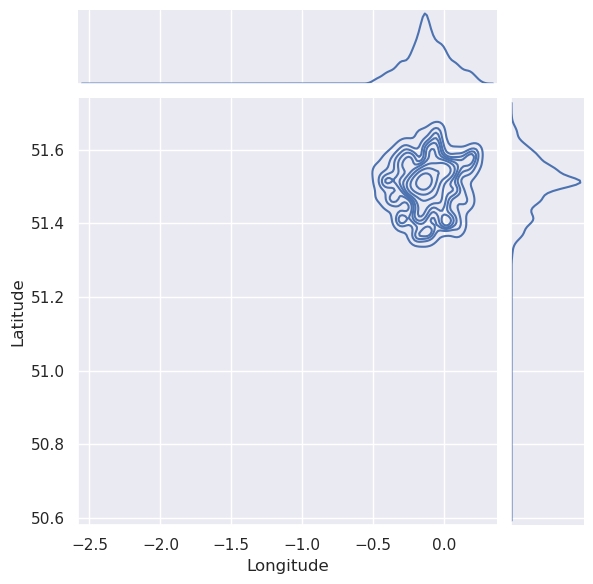

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


crime_shoplift_dec = london_subset[
    (london_subset["Crime type"] == "Shoplifting") & 
    (london_subset["Month"] == "2018-12")
]

# Create a joint plot using seaborn
sns.jointplot(x="Longitude", y="Latitude", data=crime_bicycle_jul, kind="kde")

# Show the plot
plt.show()

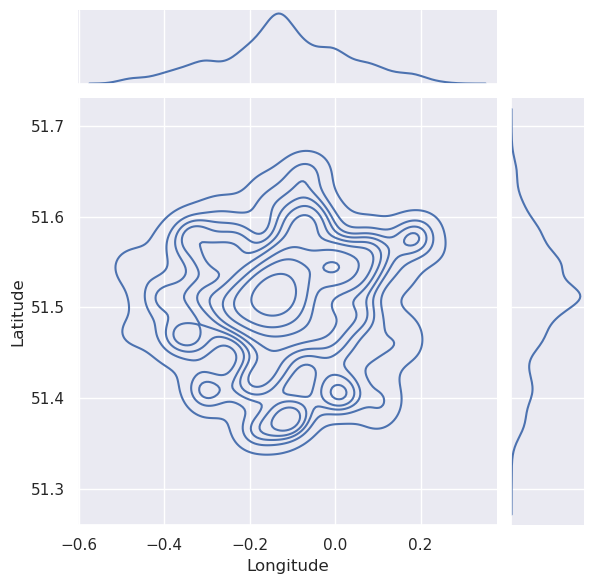

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt


crime_burglary_oct = london_subset[
    (london_subset["Crime type"] == "Burglary") & 
    (london_subset["Month"] == "2018-10")
]

# Create a joint plot using seaborn
sns.jointplot(x="Longitude", y="Latitude", data=crime_bicycle_jul, kind="kde")

# Show the plot
plt.show()